In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# from exoplanets.org 
plist = 'exoplanets.csv'

df = pd.read_csv(plist)
df.shape

(4561, 9)

In [4]:
df.columns

Index(['NAME', 'MSINI', 'A', 'PER', 'FIRSTREF', 'FIRSTURL', 'KEPID', 'RA',
       'DEC'],
      dtype='object')

In [5]:
# KNOBS TO TURN

PerLim = 50. # max period to consider (days)
dlimit = 10 # projected sep max (deg)
nbin = 50 # number bins to compute average period differences over

# select objects within the Kepler field, and within the Period limit
pok = (df['PER'] < PerLim) & (df['RA'] > 5) & (df['DEC'] > 5)

print(sum(pok))

1937


1937


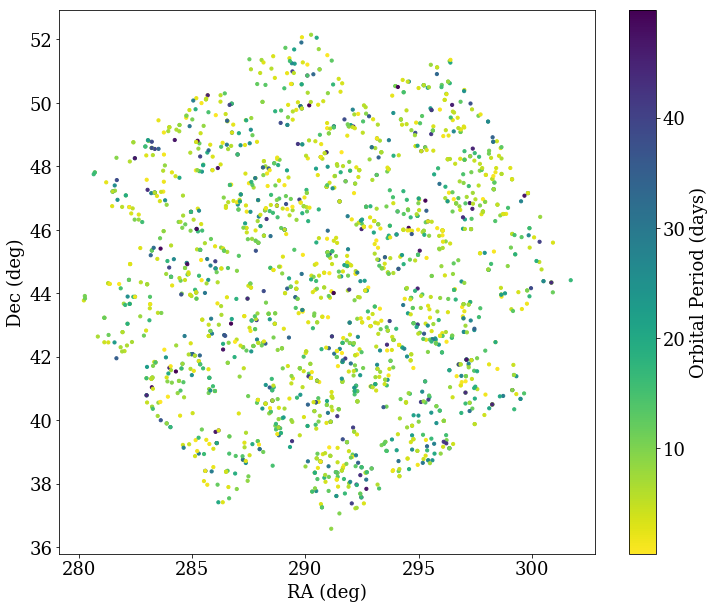

In [6]:
plt.figure(figsize=(12,10))

plt.scatter(df['RA'][pok], df['DEC'][pok], c=df['PER'][pok], cmap=cm.viridis_r, s=10)

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
cb = plt.colorbar()
cb.set_label('Orbital Period (days)')
print(sum(pok))

Text(0, 0.5, 'Number of Planets')

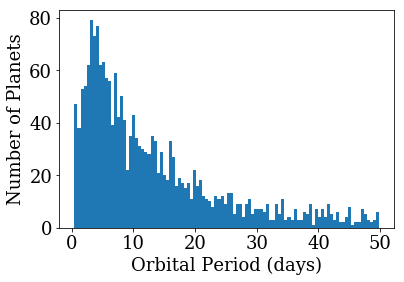

In [7]:
_ = plt.hist(df['PER'][pok], bins=100)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Number of Planets')

In [8]:
# step thru all the exoplanets in this sample w/ P<P_crit (50day?)
# make the radial profile of Period vs Projected radius (ignore distance.... for now)
# should just be noise. Any coherant outliers?

big_dist = np.zeros((sum(pok), sum(pok)))
big_dper = np.zeros((sum(pok), sum(pok)))


for k in range(sum(pok)):
    dist = np.sqrt((df['RA'][pok].values[k] - df['RA'][pok].values)**2 + 
                   (df['DEC'][pok].values[k] - df['DEC'][pok].values)**2)
    
    big_dist[k,:] = dist
    big_dper[k,:] = (df['PER'][pok].values - df['PER'][pok].values[k])
    

In [9]:
big_dist.shape

(1937, 1937)

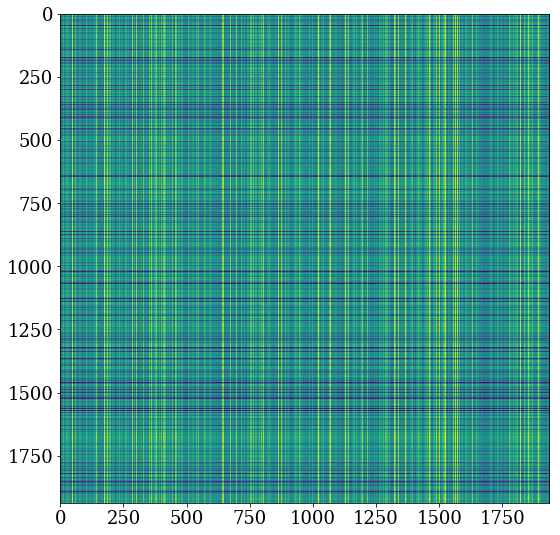

In [57]:
plt.figure(figsize=(9,9))
plt.imshow(big_dper)

# awesome plaid, i'd wear this shirt...

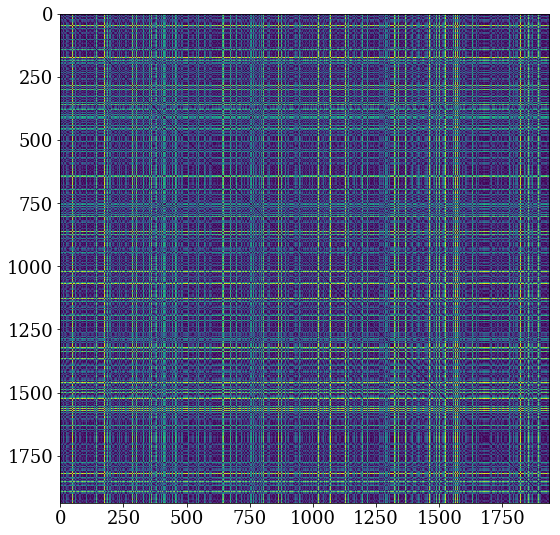

In [62]:
plt.figure(figsize=(9,9))
plt.imshow(np.abs(big_dper))

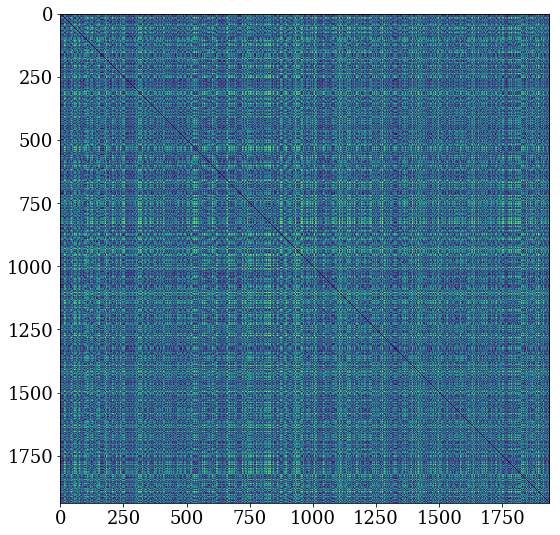

In [55]:
plt.figure(figsize=(9,9))
plt.imshow(big_dist)

In [14]:
# big_dist.shape
np.ravel(big_dist).shape

(3751969,)

(0, 3)

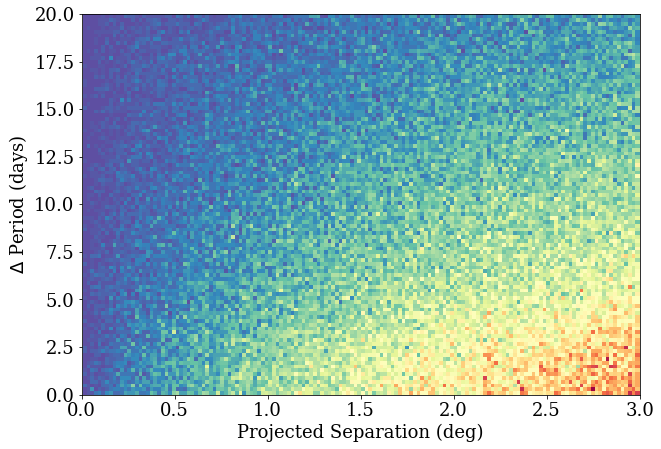

In [45]:
plt.figure(figsize=(10,7))

# plt.scatter(big_dist, (big_dper), s=2, alpha=0.1)
hh, xe, ye, im = plt.hist2d((np.ravel(big_dist)), np.ravel(np.abs(big_dper)), 
                            bins=(150,100), range=[[0.01, 3], [0,20]], cmap=plt.cm.Spectral_r)

plt.xlabel('Projected Separation (deg)') 
plt.ylabel(r'$\Delta$ Period (days)')
plt.xlim(0,3)

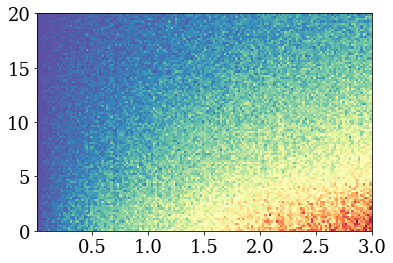

In [51]:
hh2, xe, ye, im = plt.hist2d(np.random.permutation(np.ravel(big_dist)), np.ravel(np.abs(big_dper)), 
                            bins=(150,100), range=[[0.01, 3], [0,20]], cmap=plt.cm.Spectral_r)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


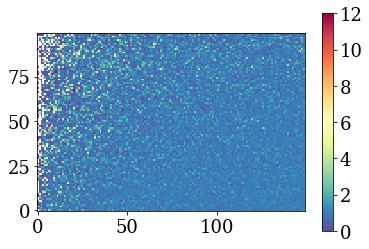

In [52]:
plt.imshow(hh.T/hh2.T, origin='lower', cmap=plt.cm.Spectral_r)
cb=plt.colorbar()

Text(0.5, 0, '$\\Delta$ Period (days)')

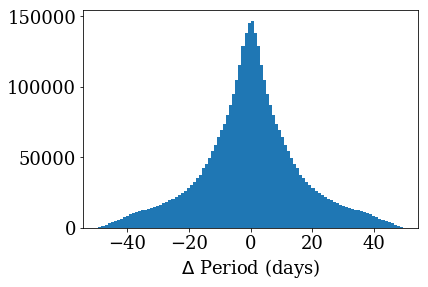

In [54]:
_ = plt.hist(np.ravel(big_dper), bins=100)
plt.xlabel(r'$\Delta$ Period (days)')



In [ ]:
xbout = np.zeros(nbin)
ybout = np.zeros(nbin)
yeout = np.zeros(nbin)

# do average in all separation distance bins
for k in range(nbin):

    ok = np.where((big_dist > 0) & 
              (big_dist > np.float(k) * dlimit / nbin) & 
              (big_dist < np.float(k+1) * dlimit / nbin))[0]

    print(k, np.size(ok))
    yeb = np.nanstd(np.abs(big_dper[ok])) / np.sqrt(np.float(np.sum(np.size(ok))))
    
    xbout[k] = np.nanmedian(big_dist[ok])
    ybout[k] = np.nanmedian(np.abs(big_dper[ok]))
    yeout[k] = yeb



In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(big_dist, (big_dper), s=2, alpha=0.1)

# plt.errorbar(xbout,ybout, yerr=yeout,
#              linestyle='none', c='C1', marker='o')

plt.xscale('log')
# plt.xlim(-0.05,dlimit)
plt.xlabel('Projected Separation (deg)') 
plt.ylabel(r'$\Delta$ Period (days)')
# plt.savefig('delta_per.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [ ]:
plt.errorbar(xbout,ybout, yerr=yeout,
             linestyle='none', marker='o', color='C1')

# plt.xlim(-0.05,dlimit)
plt.xlabel('Projected Separation (deg)') 
plt.ylabel(r'$\Delta$ Period (days)')
# plt.ylim(1,17)
# plt.xscale('log')
# plt.savefig('delta_per.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [ ]:
xbout.shape

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(big_dist * 3600., np.abs(big_dper), s=15, alpha=0.35)


huh = np.where((big_dist*3600 < 3e1) &  (big_dist*3600 > 1e1) & (np.abs(big_dper) < 2))
print(huh)

pokW = np.where((df['PER'] < PerLim) & (df['RA'] > 5) & (df['DEC'] > 5))[0]
print(np.shape(pokW))


plt.scatter(big_dist[huh] * 3600., np.abs(big_dper[huh]), c='r', s=50)



# plt.xlim(-0.05,0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1000)
plt.ylim(1e-2,10)
plt.xlabel('Projected Separation (arcsec)') 
plt.ylabel(r'$\Delta$ Period (days)')
plt.savefig('delta_per2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [ ]:
from astroML.correlation import two_point, bootstrap_two_point

In [ ]:
X = np.vstack((df['RA'][pok], df['DEC'][pok], df['PER'][pok])).T
X2 = np.vstack((df['RA'][pok], df['DEC'][pok])).T

In [ ]:
bins2pt = np.linspace(0.02, 3, 50)
# bins2pt = np.logspace(-1, 0.3, 50)

tpt = two_point(X, bins2pt)
tpt2 = two_point(X2, bins2pt)

In [ ]:
plt.plot(bins2pt[1:], tpt, label='(ra, dec, P)')
plt.plot(bins2pt[1:], tpt2, label='(ra, dec)')
# plt.xscale('log')
plt.xlabel('Dist (deg)')
plt.ylabel('2pt Correlation')
plt.legend(fontsize=12)

In [ ]:
corr, cerr = bootstrap_two_point(X, bins2pt, Nbootstrap=50)
corr2, cerr2 = bootstrap_two_point(X2, bins2pt, Nbootstrap=50)

In [ ]:
plt.errorbar(0.5*(bins2pt[1:]+bins2pt[0:-1]), corr, yerr=cerr, label='(ra, dec, P$_{orb}$)')
plt.errorbar(0.5*(bins2pt[1:]+bins2pt[0:-1]), corr2, yerr=cerr2, label='(ra, dec)')

plt.xlabel('Dist (deg)')
plt.ylabel('2pt Correlation')
plt.legend(fontsize=12)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,2)
plt.plot([0,max(bins2pt)], [0,0], c='k', alpha=0.5)